In [2]:
import matplotlib.pyplot as plt


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [298]:
import networkx as nx
from eppy.bunch_subclass import EpBunch
from geomeppy import IDF
from geomeppy import extractor
import seaborn as sns
import polars as pl
import numpy as np
from dataclasses import dataclass

from case_edits.ezcase import *
from helpers.helpers import *
from helpers.variables import *
from helpers.variable_interfaces import *
from setup.setup import *
from setup.plots import *
from setup.data_wrangle import *
from analysis.data_on_network import *

import matplotlib.cm as cm
import matplotlib as mpl


from matplotlib.colors import Colormap, Normalize, LinearSegmentedColormap

from helpers.ep_helpers import *
from subsurfaces.creator import SubsurfaceCreator
from airflow_network.airboundary import *
from subsurfaces.logic import find_surface_connecting_two_zones
from analysis.dataframes import *

from eppy.constructions import thermal_properties
from constructions.constructions import *
from constructions.unified_constructions import create_unified_constructions_idf
import re

from itertools import product
from constructions.constructions import CONSTRUCTION_SET_TYPE

from setup.materials_setup import create_materials_cases, create_directories

In [293]:
CONSTRUCTION_SET_TYPE

typing.Literal['Light', 'Medium', 'Heavy']

In [294]:
prods = list(product([1,2,3], [1, 8,7]))
[f"{i}_{j}" for i,j in prods]

['1_1', '1_8', '1_7', '2_1', '2_8', '2_7', '3_1', '3_8', '3_7']

In [295]:
[1,2,3]*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [279]:
# cases = retrieve_cases(AIRBOUNDARY_FOLDER)
# case = cases[0]

case = retrieve_test_case("test25_airwall")
case
# case2 = create_ezcase(case.path_to_output, case.path_to_input)
# case2
# case2.run_idf()

CaseData(case_name='test', idf=<geomeppy.idf.IDF object at 0x112b84700>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test25_airwall/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test25_airwall'))

In [281]:
case2 = create_ezcase(case.path_to_output, case.path_to_input)

out.idf does not exist


In [282]:
doors = [i for i in  case2.idf.idfobjects["AIRFLOWNETWORK:MULTIZONE:SURFACE"] if "Door" in i.Surface_Name ]

for door in doors:
    door.Ventilation_Control_Mode = "ZoneLevel"
case2.compare_and_save()

out.idf does not exist


In [283]:
[i.Surface_Name for i in doors]

['Block 06 Storey 0 Wall 0002_1 Door', 'Block 05 Storey 0 Wall 0002_2 Door']

In [284]:
# case2.run_idf()

idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/tests/test25_airwall/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_bbdabf.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.11.02 10:50
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/01/2017 for SUMMERDAY
Writing tabular output file results using HTML format.
Writing final SQL reports
EnergyPlus Run Time=00hr 00min  0.36sec


EnergyPlus Completed Successfully.


shape: (4, 2)
┌────────────┬───────────┐
│ room_names ┆ values    │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ 0-bed_n    ┆ -0.433024 │
│ 1-living   ┆ -0.500923 │
│ 5-bed      ┆ -0.592092 │
│ 6-transit  ┆ -0.478603 │
└────────────┴───────────┘


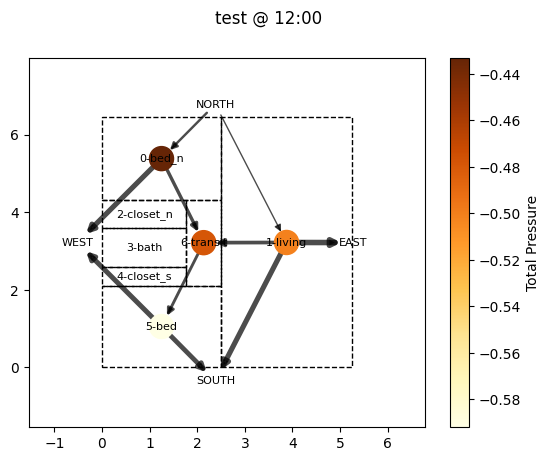

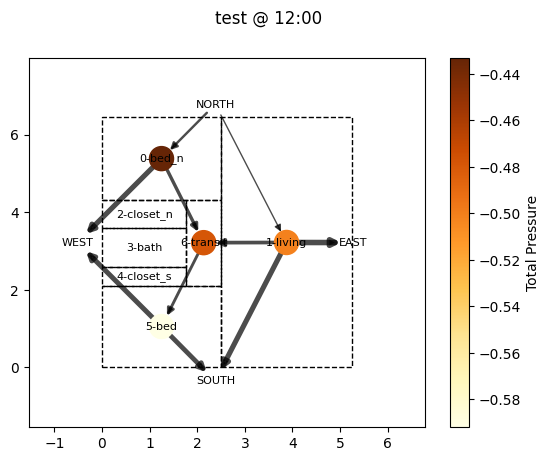

In [285]:
from analysis.pressure_on_network import create_network_plot


create_network_plot(case)